# **Proyecto Final: Visualización de Datos**

###### Grupo 1
**Tema : CATALOGO SISMICO 1960-2021 (IGP)**

Integrantes:

*   Marin Zúñiga, Antony
*   Serquén Yparraguirre, Oscar Alex
*   Nestor Raul Cardenas Sanchez
*   Victor Junior's Deza Quinteros
*   Pedro Ancajima Arrospide






Referencias: 
https://automating-gis-processes.github.io/2016/Lesson3-point-in-polygon.html

Data: https://www.datosabiertos.gob.pe/dataset/catalogo-sismico-1960-2021-igp


In [3]:
!pip install chart_studio
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 35.8 MB/s 
     |████████████████████████████████| 16.6 MB 52.0 MB/s 
     |████████████████████████████████| 7.8 MB 58.4 MB/s 


In [4]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.offline as pyo
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go

%matplotlib inline

## *** Importar Datos ***

In [7]:
# Ruta de la Data de Movimientos sismicos
#url = "https://www.datosabiertos.gob.pe/sites/default/files/Catalogo1960_2021.xlsx"
url = "https://github.com/aserquen/sismos/Catalogo1960_2021.xlsx"
# Ruta de shapefiles
mainpath = "https://github.com/aserquen/sismos"
filename = "per_admbnda_adm1_ign_20200714.shp"
fullpath_shp = os.path.join(mainpath, filename)

In [8]:
#Importar datos de Temblores
df = pd.read_excel(url)

#Importar capa de departamento Peru
regiones = gpd.read_file(fullpath_shp)

HTTPError: ignored

## *** Tratamiento de los Datos ***

In [ ]:
# Converitmos la base de dataframe a geodataframe
df = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.LONGITUD, df.LATITUD))
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22712 entries, 0 to 22711
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID           22712 non-null  int64   
 1   FECHA_UTC    22712 non-null  int64   
 2   HORA_UTC     22712 non-null  int64   
 3   LATITUD      22712 non-null  float64 
 4   LONGITUD     22712 non-null  float64 
 5   PROFUNDIDAD  22712 non-null  int64   
 6   MAGNITUD     22712 non-null  float64 
 7   FECHA_CORTE  22712 non-null  int64   
 8   geometry     22712 non-null  geometry
dtypes: float64(3), geometry(1), int64(5)
memory usage: 1.6 MB


In [ ]:
# Cambiar el tipo de dato y se crea la columna ubicacion(concatenado de Latitud + longitug)
df.FECHA_UTC = df.FECHA_UTC.astype('string').str[:4].astype('int64') #Convertir año de string a tipo numerico
df['UBICACION'] = df.LATITUD.astype('string').str.cat(df.LONGITUD.astype('string'), sep=',')

In [ ]:
"""
######## Metodo 1 para encontrar el punto geometry y el departamento al que pertenece - Encontrar el departamento es un proceso demasiado lento ########

# Agregar el punto poligono llamado geometry
from shapely.geometry import Point, Polygon
geometry = []
for i in range(len(df2)):
    punto = Point(df2.iloc[i]['LONGITUD'], df2.iloc[i]['LATITUD'])
    geometry.append(punto) 
df2['geometry'] = geometry

# Se agrega una columna tipo cadena con el distrito,provincia,departamento,pais - Este procesamiento se demora por que hace la busqueda de todas la ubicaciones en todo el mundo
from geopy.geocoders import Nominatim 
geoLoc = Nominatim(user_agent="GetLoc") 
lugar = []
for i in range(len(df2)):
    ubica = df2.iloc[i]['UBICACION']
    local = geoLoc.reverse(ubica)
    lugar.append(local.address)
df2['LUGAR'] = lugar

# Se filtra todas las ubicaciones de Peru , quedandose con los departamento de Peru
df2 = df2[df2.LUGAR.str.contains('Perú') == True]
df2.loc[df2.LUGAR.str.contains('Arequipa') == True, 'LUGAR'] = 'Arequipa'
df2.loc[df2.LUGAR.str.contains('Ica') == True, 'LUGAR'] = 'Ica'
df2.loc[df2.LUGAR.str.contains('Piura') == True, 'LUGAR'] = 'Piura'
df2.loc[df2.LUGAR.str.contains('Lima') == True, 'LUGAR'] = 'Lima'
df2.loc[df2.LUGAR.str.contains('Loreto') == True, 'LUGAR'] = 'Loreto'
df2.loc[df2.LUGAR.str.contains('Tacna') == True, 'LUGAR'] = 'Tacna'
df2.loc[df2.LUGAR.str.contains('Ucayali') == True, 'LUGAR'] = 'Ucayali'
df2.loc[df2.LUGAR.str.contains('Moquegua') == True, 'LUGAR'] = 'Moquegua'
df2.loc[df2.LUGAR.str.contains('Ayacucho') == True, 'LUGAR'] = 'Ayacucho'
df2.loc[df2.LUGAR.str.contains('Huánuco') == True, 'LUGAR'] = 'Huanuco'
df2.loc[df2.LUGAR.str.contains('Madre de Dios') == True, 'LUGAR'] = 'Madre de Dios'
df2.loc[df2.LUGAR.str.contains('Pasco') == True, 'LUGAR'] = 'Pasco'
df2.loc[df2.LUGAR.str.contains('San Martín') == True, 'LUGAR'] = 'San Martin'
df2.loc[df2.LUGAR.str.contains('Tumbes') == True, 'LUGAR'] = 'Tumbes'
df2.loc[df2.LUGAR.str.contains('Lambayeque') == True, 'LUGAR'] = 'Lambayeque'
df2.loc[df2.LUGAR.str.contains('La Libertad') == True, 'LUGAR'] = 'La Libertad'
df2.loc[df2.LUGAR.str.contains('Ancash') == True, 'LUGAR'] = 'Ancash'
df2.loc[df2.LUGAR.str.contains('Amazonas') == True, 'LUGAR'] = 'Amazonas'
df2.loc[df2.LUGAR.str.contains('Apurímac') == True, 'LUGAR'] = 'Apurimac'
df2.loc[df2.LUGAR.str.contains('Callao') == True, 'LUGAR'] = 'Callao'
df2.loc[df2.LUGAR.str.contains('Cusco') == True, 'LUGAR'] = 'Cusco'
df2.loc[df2.LUGAR.str.contains('Huancavelica') == True, 'LUGAR'] = 'Huancavelica'
df2.loc[df2.LUGAR.str.contains('Junín') == True, 'LUGAR'] = 'Junin'
df2.loc[df2.LUGAR.str.contains('Puno') == True, 'LUGAR'] = 'Puno'
df2.loc[df2.LUGAR.str.contains('Cajamarca') == True, 'LUGAR'] = 'Cajamarca'
df2.head()

# Filtramos los registros que son departamentos de Peru
df2 = df2[df2.LUGAR.str.contains('Perú') == False]
df2.head()
"""

'\n######## Metodo 1 para encontrar el punto geometry y el departamento al que pertenece - Encontrar el departamento es un proceso demasiado lento ########\n\n# Agregar el punto poligono llamado geometry\nfrom shapely.geometry import Point, Polygon\ngeometry = []\nfor i in range(len(df2)):\n    punto = Point(df2.iloc[i][\'LONGITUD\'], df2.iloc[i][\'LATITUD\'])\n    geometry.append(punto) \ndf2[\'geometry\'] = geometry\n\n# Se agrega una columna tipo cadena con el distrito,provincia,departamento,pais - Este procesamiento se demora por que hace la busqueda de todas la ubicaciones en todo el mundo\nfrom geopy.geocoders import Nominatim \ngeoLoc = Nominatim(user_agent="GetLoc") \nlugar = []\nfor i in range(len(df2)):\n    ubica = df2.iloc[i][\'UBICACION\']\n    local = geoLoc.reverse(ubica)\n    lugar.append(local.address)\ndf2[\'LUGAR\'] = lugar\n\n# Se filtra todas las ubicaciones de Peru , quedandose con los departamento de Peru\ndf2 = df2[df2.LUGAR.str.contains(\'Perú\') == True]\ndf2.

In [ ]:
######## Metodo 2 para encontrar el departamento al que pertenece ########
departamento = []

for i in range(len(df)):
  exists = False
  for j in range(len(regiones)):
    if regiones.iloc[j]['geometry'].contains(df.iloc[i]['geometry']):
      dep = regiones.iloc[j]['ADM1_ES']
      departamento.append(dep)
      exists = True
      break
  if exists == False:
    departamento.append("otros")
df['LUGAR'] = departamento

# Filtramos los registros que son departamentos de Peru
df2 = df[df.LUGAR != 'otros'].copy()

In [ ]:
# Guardamos el archivo para ya no volver a ejecutar los codigos anteriores
#df2.to_csv('/content/drive/MyDrive/Diplomado_IA_PUCP/Modulo_1/Visualizacion_Datos/Trabajo Final - Visualizacion de Datos/Catalogo1960_2021_df2.csv', sep=';', encoding="utf-8")

## *** Tablas Finales para el Analisis ***

In [ ]:
# Tabla que contiene la informacion de todos los movimientos sismicos con su respectivo punto poligonal(geometry) y su departamento al que pertenece(LUGAR).
# Categorizar las variables Magnitud y Latitud
df2['MAGNITUD_CAT'] = pd.cut(df2['MAGNITUD'],
                                bins=[3,4,6,np.inf], # Rangos de los intervalos
                                labels=['Leve','Moderado','Fuerte'], # Nombre de los intervalos
                                right = False,  # contenedores incluyen el borde de la derecha o no.
                                ordered=True)   # 3<= x <4 , 4<= x <6 , 6<= x <=8
df2['MAGNITUD_CAT2'] = pd.cut(df2['MAGNITUD'],
                                bins=[3,4,5,6,7,np.inf], # Rangos de los intervalos
                                labels=['[3 - 4>','[4 - 5>','[5 - 6>','[6 - 7>','[7 - 8]'], # Nombre de los intervalos
                                right = False,  # contenedores incluyen el borde de la derecha o no.
                                ordered=True
                             )   # 3<= x <4 , 4<= x <5 , 5<= x <=6 , 6<= x <7 , 7<= x <=8
df2['PROFUNDIDAD_CAT'] = pd.cut(df2['PROFUNDIDAD'],
                                bins=[0,60,300,np.inf], # Rangos de los intervalos
                                labels=['Superficial','Intermedia','Profundo'], # Nombre de los intervalos
                                right = False,  # contenedores incluyen el borde de la derecha o no.
                                ordered=True)   # x <60 , 60<= x <350 , x > 300
df2.shape , df2.head()

((13308, 14),
    ID  FECHA_UTC  HORA_UTC  LATITUD  LONGITUD  PROFUNDIDAD  MAGNITUD  \
 0   0       1960    154034  -16.145   -72.144           60       7.5   
 1   1       1960     93024  -15.000   -75.000           70       7.0   
 2   2       1960     25758  -14.500   -74.500          150       6.4   
 4   4       1960     50724   -5.500   -77.500          100       5.7   
 5   5       1960    190616   -8.500   -74.500          136       5.3   
 
    FECHA_CORTE                     geometry        UBICACION     LUGAR  \
 0     20223006  POINT (-72.14400 -16.14500)  -16.145,-72.144  Arequipa   
 1     20223006  POINT (-75.00000 -15.00000)      -15.0,-75.0       Ica   
 2     20223006  POINT (-74.50000 -14.50000)      -14.5,-74.5  Ayacucho   
 4     20223006   POINT (-77.50000 -5.50000)       -5.5,-77.5    Loreto   
 5     20223006   POINT (-74.50000 -8.50000)       -8.5,-74.5   Ucayali   
 
   MAGNITUD_CAT MAGNITUD_CAT2 PROFUNDIDAD_CAT  
 0       Fuerte       [7 - 8]      Intermedia 

In [ ]:
# Tabla que contiene la informacion de todos los movimientos sismicos mayor e igual a 4grados con su respectivo punto poligonal(geometry) y su departamento al que pertenece(LUGAR).
df3=df2[df2['MAGNITUD']>=4]
# Categorizar las variables Magnitud y Latitud
df3['MAGNITUD_CAT'] = pd.cut(df3['MAGNITUD'],
                                bins=[4,6,np.inf], # Rangos de los intervalos
                                labels=['Moderado','Fuerte'], # Nombre de los intervalos
                                right = False,  # contenedores incluyen el borde de la derecha o no.
                                ordered=True)   # 3<= x <4 , 4<= x <6 , 6<= x <=8
df3['MAGNITUD_CAT2'] = pd.cut(df3['MAGNITUD'],
                                bins=[4,5,6,7,np.inf], # Rangos de los intervalos
                                labels=['[4 - 5>','[5 - 6>','[6 - 7>','[7 - 8]'], # Nombre de los intervalos
                                right = False,  # contenedores incluyen el borde de la derecha o no.
                                ordered=True
                             )   # 3<= x <4 , 4<= x <5 , 5<= x <=6 , 6<= x <7 , 7<= x <=8
df3['PROFUNDIDAD_CAT'] = pd.cut(df3['PROFUNDIDAD'],
                                bins=[0,60,300,np.inf], # Rangos de los intervalos
                                labels=['Superficial','Intermedia','Profundo'], # Nombre de los intervalos
                                right = False,  # contenedores incluyen el borde de la derecha o no.
                                ordered=True)   # x <60 , 60<= x <350 , x > 300
df3.shape , df3.head()

((12764, 14),
    ID  FECHA_UTC  HORA_UTC  LATITUD  LONGITUD  PROFUNDIDAD  MAGNITUD  \
 0   0       1960    154034  -16.145   -72.144           60       7.5   
 1   1       1960     93024  -15.000   -75.000           70       7.0   
 2   2       1960     25758  -14.500   -74.500          150       6.4   
 4   4       1960     50724   -5.500   -77.500          100       5.7   
 5   5       1960    190616   -8.500   -74.500          136       5.3   
 
    FECHA_CORTE                     geometry        UBICACION     LUGAR  \
 0     20223006  POINT (-72.14400 -16.14500)  -16.145,-72.144  Arequipa   
 1     20223006  POINT (-75.00000 -15.00000)      -15.0,-75.0       Ica   
 2     20223006  POINT (-74.50000 -14.50000)      -14.5,-74.5  Ayacucho   
 4     20223006   POINT (-77.50000 -5.50000)       -5.5,-77.5    Loreto   
 5     20223006   POINT (-74.50000 -8.50000)       -8.5,-74.5   Ucayali   
 
   MAGNITUD_CAT MAGNITUD_CAT2 PROFUNDIDAD_CAT  
 0       Fuerte       [7 - 8]      Intermedia 

In [ ]:
# Tabla que contiene el total de Movimientos Sismicos por departamento
#df3 = df2.groupby(['FECHA_UTC','LUGAR']).size().reset_index(name='Total')
df2_grupo = df2.groupby(['FECHA_UTC','LUGAR'], sort=False).count()['ID'].reset_index(name='Total')
df2_grupo.head()

,FECHA_UTC,LUGAR,Total
0,1960,Arequipa,5
1,1960,Ica,1
2,1960,Ayacucho,2
3,1960,Loreto,2
4,1960,Ucayali,1


In [ ]:
# Tabla que contiene la capa de las regiones a la cual se le ha incluido la cantidad de Movimientos sismicos del 2021
regiones_df2_2021 = regiones.merge(
                              right = df2_grupo[df2_grupo.FECHA_UTC >= 2021],
                              left_on = 'ADM1_ES',
                              right_on = 'LUGAR',
                              how = 'left'
                              )
regiones_df2_2021.head()

,Shape_Leng,Shape_Area,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_EN,ADM0_ES,ADM0_PCODE,date,validOn,validTo,geometry,FECHA_UTC,LUGAR,Total
0,12.894071,3.203362,Amazonas,PE01,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",2021.0,Amazonas,3.0
1,11.640227,2.954639,Ancash,PE02,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052...",2021.0,Ancash,10.0
2,7.730082,1.765933,Apurimac,PE03,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-73.74632 -13.17456, -73.74570 -13.1...",2021.0,Apurimac,8.0
3,16.964447,5.335260,Arequipa,PE04,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...",2021.0,Arequipa,206.0
4,16.754483,3.649287,Ayacucho,PE05,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...",2021.0,Ayacucho,14.0


## *** Visualizacion - Graficos ***

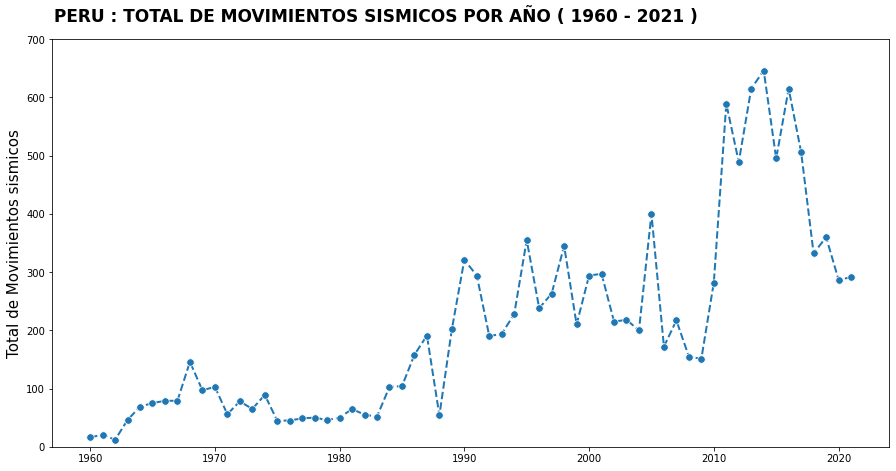

In [ ]:
import seaborn as sns
#sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
fig, ax = plt.subplots(figsize = (15,7.5))
sns.lineplot(x="FECHA_UTC", 
             y="Total",
             ls = "--", 
             marker = ".", 
             lw = 2, 
             ms = 15 ,
             data=df2[df2.MAGNITUD>=4].groupby(['FECHA_UTC']).count()['ID'].reset_index(name='Total')
             )
plt.xlabel("",
           fontsize = 15)  
plt.ylabel("Total de Movimientos sismicos",
           fontsize = 15) 
plt.suptitle('PERU : TOTAL DE MOVIMIENTOS SISMICOS POR AÑO ( 1960 - 2021 )',
             fontsize = 17,
             #horizontalalignment = 'left',
             x=0.425,
             y=0.94,
             color='black',
             fontweight='black')

plt.ylim(0,700)
plt.show()

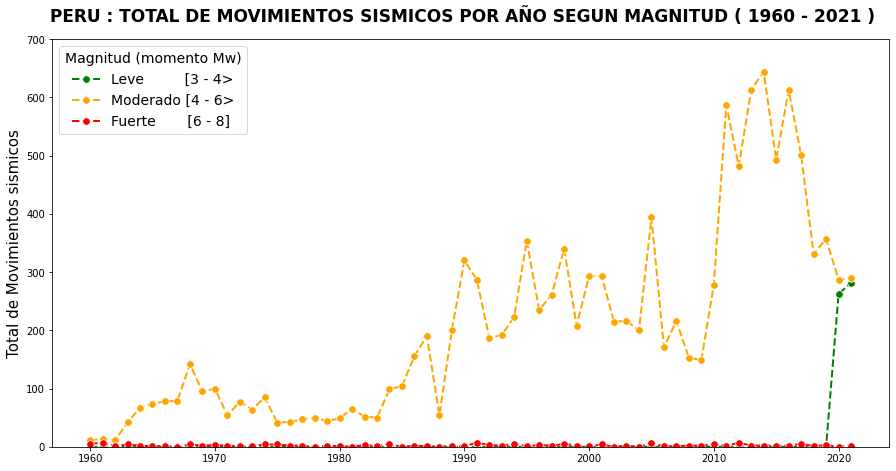

In [ ]:
import seaborn as sns
#sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
fig, ax = plt.subplots(figsize = (15,7.5))
sns.lineplot(x="FECHA_UTC", 
             y="Total",
             hue = "MAGNITUD_CAT",
             palette=['green', 'orange','red'],
             ls = "--", 
             marker = ".", 
             lw = 2, 
             ms = 15 ,
             data=df2.groupby(['FECHA_UTC',"MAGNITUD_CAT"]).count()['ID'].reset_index(name='Total')
             )
plt.xlabel("",
           fontsize = 15)  
plt.ylabel("Total de Movimientos sismicos",
           fontsize = 15) 
plt.suptitle('PERU : TOTAL DE MOVIMIENTOS SISMICOS POR AÑO SEGUN MAGNITUD ( 1960 - 2021 )',             
             fontsize = 17,
             #horizontalalignment = 'left',
             x=0.505,
             y=0.94,
             color='black',
             fontweight='black')
plt.ylim(0,700)
plt.legend(title = "Magnitud (momento Mw)",labels = ['Leve         [3 - 4>','Moderado [4 - 6>','Fuerte       [6 - 8]'], loc='upper left',fontsize = 14,title_fontsize = 14)
plt.show()

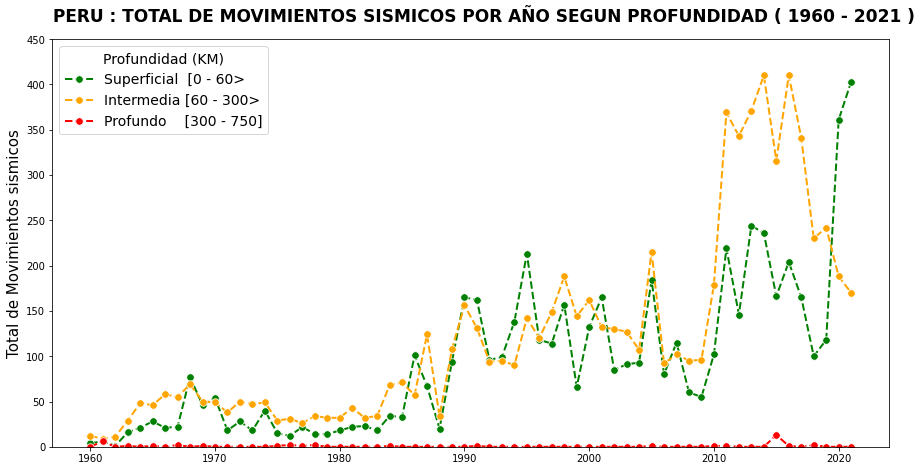

In [ ]:
import seaborn as sns
#sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
fig, ax = plt.subplots(figsize = (15,7.5))
sns.lineplot(x="FECHA_UTC", 
             y="Total",
             hue = "PROFUNDIDAD_CAT",
             palette=['green', 'orange','red'],
             ls = "--", 
             marker = ".", 
             lw = 2, 
             ms = 15 ,
             data=df2.groupby(['FECHA_UTC',"PROFUNDIDAD_CAT"]).count()['ID'].reset_index(name='Total'))
plt.xlabel("",fontsize = 15)  
plt.ylabel("Total de Movimientos sismicos",fontsize = 15) 
plt.suptitle('PERU : TOTAL DE MOVIMIENTOS SISMICOS POR AÑO SEGUN PROFUNDIDAD ( 1960 - 2021 )',             
             fontsize = 17,
             #horizontalalignment = 'left',
             x=0.525,
             y=0.94,
             color='black',
             fontweight='black')
plt.ylim(0,450)
plt.legend(title = "Profundidad (KM)",labels = ['Superficial  [0 - 60>','Intermedia [60 - 300>','Profundo    [300 - 750]'] , loc='upper left',fontsize = 14,title_fontsize = 14)
plt.show()

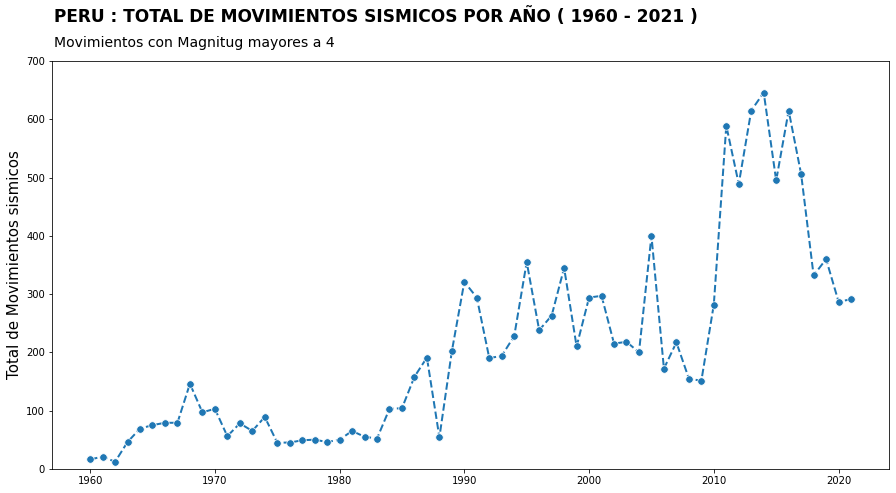

In [ ]:
import seaborn as sns
#sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
fig, ax = plt.subplots(figsize = (15,7.5))
sns.lineplot(x="FECHA_UTC", 
             y="Total",
             ls = "--", 
             marker = ".", 
             lw = 2, 
             ms = 15 ,
             data=df3.groupby(['FECHA_UTC']).count()['ID'].reset_index(name='Total')
             )
plt.xlabel("",
           fontsize = 15)  
plt.ylabel("Total de Movimientos sismicos",
           fontsize = 15) 
plt.suptitle('PERU : TOTAL DE MOVIMIENTOS SISMICOS POR AÑO ( 1960 - 2021 )',
             fontsize = 17,
             #horizontalalignment = 'left',
             x=0.425,
             y=0.98,
             color='black',
             fontweight='black')
plt.title('Movimientos con Magnitug mayores a 4',             
             fontsize = 14,
             #horizontalalignment = 'right',
             x=0.17,
             y=1.02,
             color='black')
plt.ylim(0,700)
plt.show()

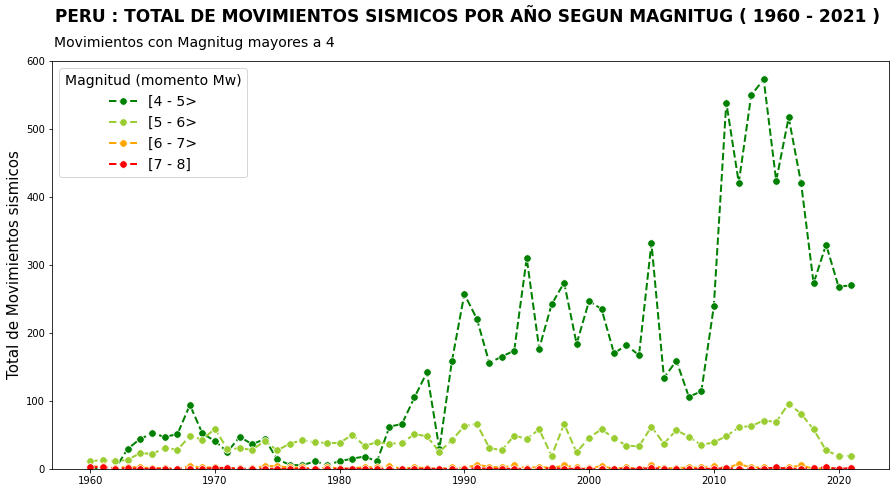

In [ ]:
import seaborn as sns
#sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
fig, ax = plt.subplots(figsize = (15,7.5))
sns.lineplot(x="FECHA_UTC", 
             y="Total",
             hue = "MAGNITUD_CAT2",
             palette=['green','yellowgreen','orange','red'],
             #palette='RdYlGn_r',
             ls = "--", 
             marker = ".", 
             lw = 2, 
             ms = 15 ,
             data=df3.groupby(['FECHA_UTC',"MAGNITUD_CAT2"]).count()['ID'].reset_index(name='Total')
             )
plt.xlabel("",
           fontsize = 15)  
plt.ylabel("Total de Movimientos sismicos",
           fontsize = 15) 
plt.suptitle('PERU : TOTAL DE MOVIMIENTOS SISMICOS POR AÑO SEGUN MAGNITUG ( 1960 - 2021 )',             
             fontsize = 17,
             #horizontalalignment = 'left',
             x=0.51,
             y=0.98,
             color='black',
             fontweight='black')
plt.title('Movimientos con Magnitug mayores a 4',             
             fontsize = 14,
             #horizontalalignment = 'right',
             x=0.17,
             y=1.02,
             color='black')
plt.ylim(0,600)
plt.legend(title = "Magnitud (momento Mw)",labels = ['[4 - 5>','[5 - 6>','[6 - 7>','[7 - 8]'], loc='upper left',fontsize = 14,title_fontsize = 14)
plt.show()

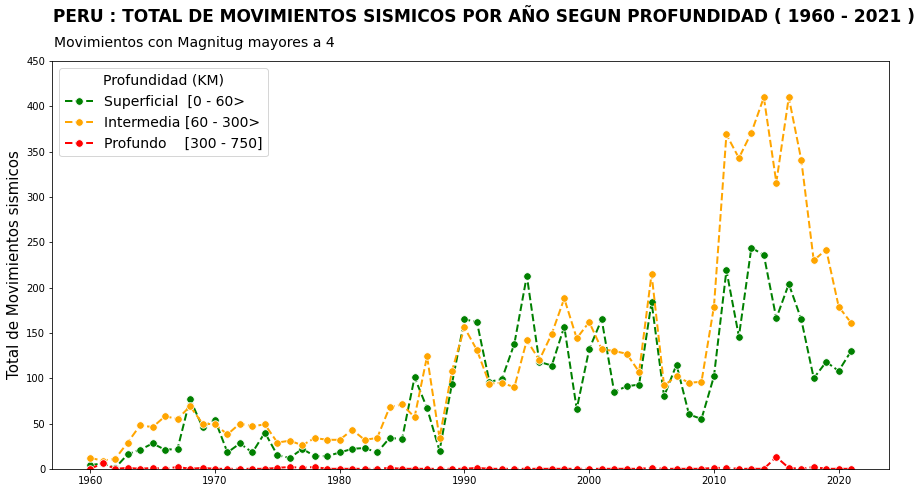

In [ ]:
import seaborn as sns
#sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
fig, ax = plt.subplots(figsize = (15,7.5))
#sns.lineplot(x="FECHA_UTC", y="Total",ls = "--", marker = ".", lw = 2, ms = 15 ,data=df2.groupby(['FECHA_UTC']).size().reset_index(name='Total'))
sns.lineplot(x="FECHA_UTC", 
             y="Total",
             hue = "PROFUNDIDAD_CAT",
             palette=['green', 'orange','red'],
             ls = "--", 
             marker = ".", 
             lw = 2, 
             ms = 15 ,
             data=df3.groupby(['FECHA_UTC',"PROFUNDIDAD_CAT"]).count()['ID'].reset_index(name='Total'))
plt.xlabel("",fontsize = 15)  
plt.ylabel("Total de Movimientos sismicos",fontsize = 15)
plt.suptitle('PERU : TOTAL DE MOVIMIENTOS SISMICOS POR AÑO SEGUN PROFUNDIDAD ( 1960 - 2021 )',             
             fontsize = 17,
             #horizontalalignment = 'left',
             x=0.525,
             y=0.98,
             color='black',
             fontweight='black')
plt.title('Movimientos con Magnitug mayores a 4',             
             fontsize = 14,
             #horizontalalignment = 'right',
             x=0.17,
             y=1.02,
             color='black')
plt.ylim(0,450)
plt.legend(title = "Profundidad (KM)",labels = ['Superficial  [0 - 60>','Intermedia [60 - 300>','Profundo    [300 - 750]'] , loc='upper left',fontsize = 14,title_fontsize = 14)
plt.show()

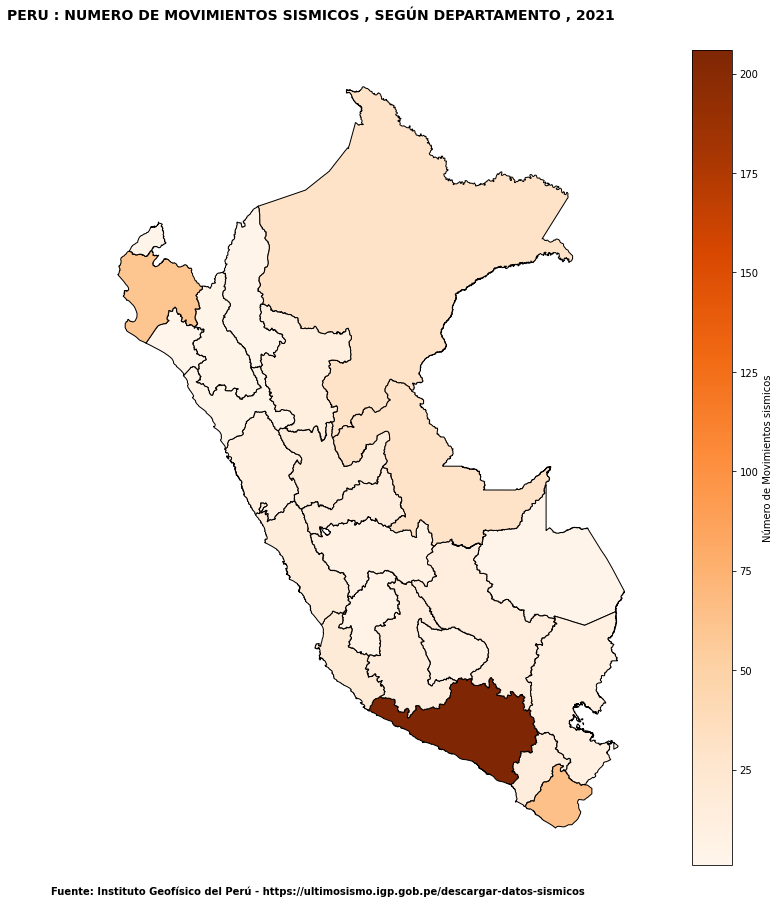

In [ ]:
# Grafica del mapa que contiene la cantidad de Movimientos sismicos para el año 2021 por departamento
fig, ax = plt.subplots(figsize = (15,15))
regiones_df2_2021.plot(ax = ax,
                       column = 'Total', 
                       legend = True, 
                       linewidth = 1, #ajustando el grosor de las lineas del mapa
                       edgecolor ='black', #color de las lineas del mapa
                       legend_kwds = {
                           'label': "Número de Movimientos sismicos",
                           'orientation': "vertical"
                           },
                       cmap = 'Oranges'
                       )

plt.suptitle('PERU : NUMERO DE MOVIMIENTOS SISMICOS , SEGÚN DEPARTAMENTO , 2021', 
             fontsize = 14,
             horizontalalignment = 'left',
             x=0.15,
             y=0.92,
             color='black',
             fontweight='black')
plt.text(s='Fuente: Instituto Geofísico del Perú - https://ultimosismo.igp.gob.pe/descargar-datos-sismicos',
         fontsize=10,
         horizontalalignment = 'left',
         x=-83,
         y=-20,
         color='black',
         fontweight='black')
plt.axis('off') #desactivando los ejes de posicionamiento
plt.show()

GRÁFICA: MOVIMIENTOS SISMICOS DEL PERÚ (2018 - 2021)

2018

/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:656: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.

/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.



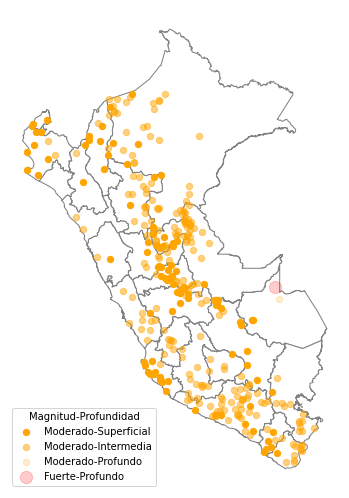

In [ ]:
profundidad = df2["PROFUNDIDAD_CAT"].cat.categories
magnitud = df2["MAGNITUD_CAT"].cat.categories

fig, ax = plt.subplots(figsize = (6,9))
regiones.plot(ax = ax, color = 'white', edgecolor = 'grey', column = 'ADM1_ES')
anual = 2018
p_val = [1, 0.5, 0.2]
m_val = [10, 40, 150]
c_val = ["green", "orange", "red"]
i = 0
j = 0
for m in magnitud:
  j = 0
  for p in profundidad:
    df2[(df2.FECHA_UTC >= anual) & (df2.FECHA_UTC < (anual + 1)) & (df2.MAGNITUD_CAT == m) & (df2.PROFUNDIDAD_CAT == p)][['geometry','LUGAR','MAGNITUD','MAGNITUD_CAT']].plot(ax = ax, markersize = m_val[i],label=m + "-" + p ,  alpha=p_val[j], color = c_val[i])
    j = j + 1
  i = i + 1

plt.legend(title = "Magnitud-Profundidad", loc = 'lower left')
plt.axis('off') #desactivando los ejes de posicionamiento
plt.show()

2019

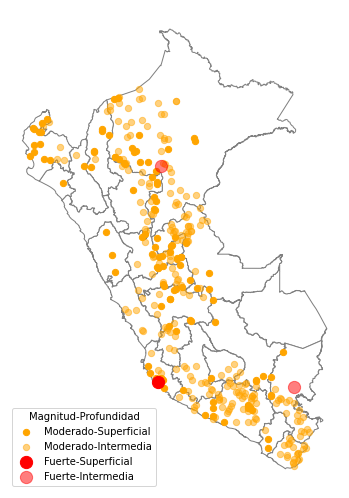

In [ ]:
fig, ax = plt.subplots(figsize = (6,9))
regiones.plot(ax = ax, color = 'white', edgecolor = 'grey', column = 'ADM1_ES')
anual = 2019
p_val = [1, 0.5, 0.2]
m_val = [10, 40, 150]
c_val = ["green", "orange", "red"]
i = 0
j = 0
for m in magnitud:
  j = 0
  for p in profundidad:
    df2[(df2.FECHA_UTC >= anual) & (df2.FECHA_UTC < (anual + 1)) & (df2.MAGNITUD_CAT == m) & (df2.PROFUNDIDAD_CAT == p)][['geometry','LUGAR','MAGNITUD','MAGNITUD_CAT']].plot(ax = ax, markersize = m_val[i],label=m + "-" + p ,  alpha=p_val[j], color = c_val[i])
    j = j + 1
  i = i + 1

plt.legend(title = "Magnitud-Profundidad", loc = 'lower left')
plt.axis('off') #desactivando los ejes de posicionamiento
plt.show()

2020

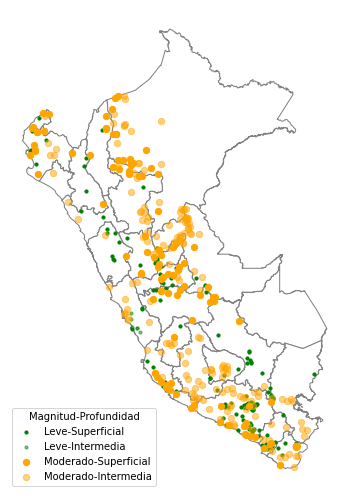

In [ ]:
fig, ax = plt.subplots(figsize = (6,9))
regiones.plot(ax = ax, color = 'white', edgecolor = 'grey', column = 'ADM1_ES')
anual = 2020
p_val = [1, 0.5, 0.2]
m_val = [10, 40, 150]
c_val = ["green", "orange", "red"]
i = 0
j = 0
for m in magnitud:
  j = 0
  for p in profundidad:
    df2[(df2.FECHA_UTC >= anual) & (df2.FECHA_UTC < (anual + 1)) & (df2.MAGNITUD_CAT == m) & (df2.PROFUNDIDAD_CAT == p)][['geometry','LUGAR','MAGNITUD','MAGNITUD_CAT']].plot(ax = ax, markersize = m_val[i],label=m + "-" + p ,  alpha=p_val[j], color = c_val[i])
    j = j + 1
  i = i + 1

plt.legend(title = "Magnitud-Profundidad", loc = 'lower left')
plt.axis('off') #desactivando los ejes de posicionamiento
plt.show()

2021

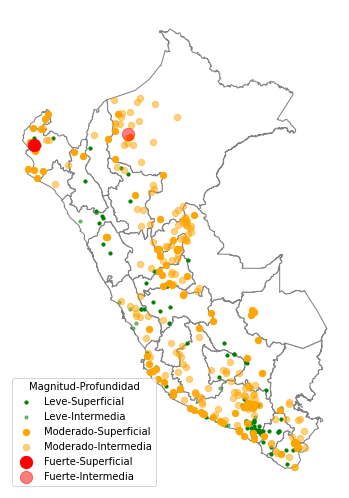

In [ ]:
fig, ax = plt.subplots(figsize = (6,9))
regiones.plot(ax = ax, color = 'white', edgecolor = 'grey', column = 'ADM1_ES')
anual = 2021
p_val = [1, 0.5, 0.2]
m_val = [10, 40, 150]
c_val = ["green", "orange", "red"]
i = 0
j = 0
for m in magnitud:
  j = 0
  for p in profundidad:
    df2[(df2.FECHA_UTC >= anual) & (df2.FECHA_UTC < (anual + 1)) & (df2.MAGNITUD_CAT == m) & (df2.PROFUNDIDAD_CAT == p)][['geometry','LUGAR','MAGNITUD','MAGNITUD_CAT']].plot(ax = ax, markersize = m_val[i],label=m + "-" + p ,  alpha=p_val[j], color = c_val[i])
    j = j + 1
  i = i + 1

plt.legend(title = "Magnitud-Profundidad", loc = 'lower left')
plt.axis('off') #desactivando los ejes de posicionamiento
plt.show()

In [ ]:
# Grafico de animacion que contenga la cantidad de Movimientos sismicos por año - Se hace uso de la tabla df3

fig = px.bar(df2_grupo, 
             y = 'LUGAR', x = 'Total', text = 'Total', color = 'LUGAR', orientation='h',\
            labels={"LUGAR":"","Total":"Número de sismos"},animation_frame="FECHA_UTC", range_x=[1,220],  )
#color_continuous_scale= 'rgb(158,202,225)'
#para colocar los números fuera de las barras
fig.update_traces(texttemplate='%{text:.0s}')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(showlegend=False, #ocultra leyendas
                  title='<b>Número de sismos por año en Peru (1960 - 2021)</b><br>Top 9 de departamentos con más sismos por cada año',
                  xaxis=dict(showticklabels=True)) #ocultar ticks

fig.update_yaxes(categoryorder = 'total ascending') #ordenar barras
fig